In [108]:
import sunpy.map
from sunpy.net import Fido, attrs as a
import os, glob
import numpy as np
import pandas as pd
from aiapy.calibrate import register
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import scipy.ndimage as ndimage
from datetime import datetime
from scipy.signal import resample
import astropy.units as u
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from astropy.coordinates import SkyCoord
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 14
timeformat = '%Y-%m-%dT%H:%M:%S.%f'
import warnings 
warnings.filterwarnings('ignore')

In [109]:
def timestamp(strtime,timeformat='%Y-%m-%dT%H:%M:%S.%f'):
    if not isinstance(strtime, list):
        return datetime.strptime(strtime,timeformat)
    else:
        return [datetime.strptime(time,timeformat) for time in strtime]


def find_nearest_time(strtime,comptimelist,timeformat='%Y-%m-%dT%H:%M:%S.%f',indexonly=False):
    intime=timestamp(strtime)
    comptimes=timestamp(comptimelist)
    for ind,time in enumerate(comptimes):
        if time >= intime: break
    if indexonly: return ind
    else: return (ind,time)

In [110]:
indir='/Users/kamen/Downloads/event_20220519/LASCO/'
outdir=indir
downloaded_files=glob.glob(indir+'*.fts')#['22859604.fts','22859605.fts','22859606.fts','22859607.fts']
downloaded_files.sort()
base=downloaded_files[0]
basemap=sunpy.map.Map(base)
downloaded_files.pop(0)
lasco_maps=[sunpy.map.Map(downloaded_file) for downloaded_file in downloaded_files]
lascobckg=lasco_maps[1]
lasco_times=[lascomap.date.value for lascomap in lasco_maps]
nlasco_times=len(lasco_times)-1

In [111]:
lasco_times

['2022-05-19T11:48:05.720',
 '2022-05-19T12:00:05.611',
 '2022-05-19T12:12:05.602',
 '2022-05-19T12:24:05.594',
 '2022-05-19T12:36:05.585',
 '2022-05-19T12:48:05.677']

In [112]:
lasco_bdmaps=[]
for lascomap in lasco_maps:
    bckgimg = lascomap.data-lascobckg.data
    bckgimg = bckgimg.astype(float)
    bckgimg[bckgimg < 100.] = np.nan
    bckgimg[bckgimg > 1000.] = np.nan
    lascobdmap = sunpy.map.Map(bckgimg,lascomap.meta)
    lasco_bdmaps.append(lascobdmap)

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


(<matplotlib.patches.Circle at 0x1694f63e0>, None)

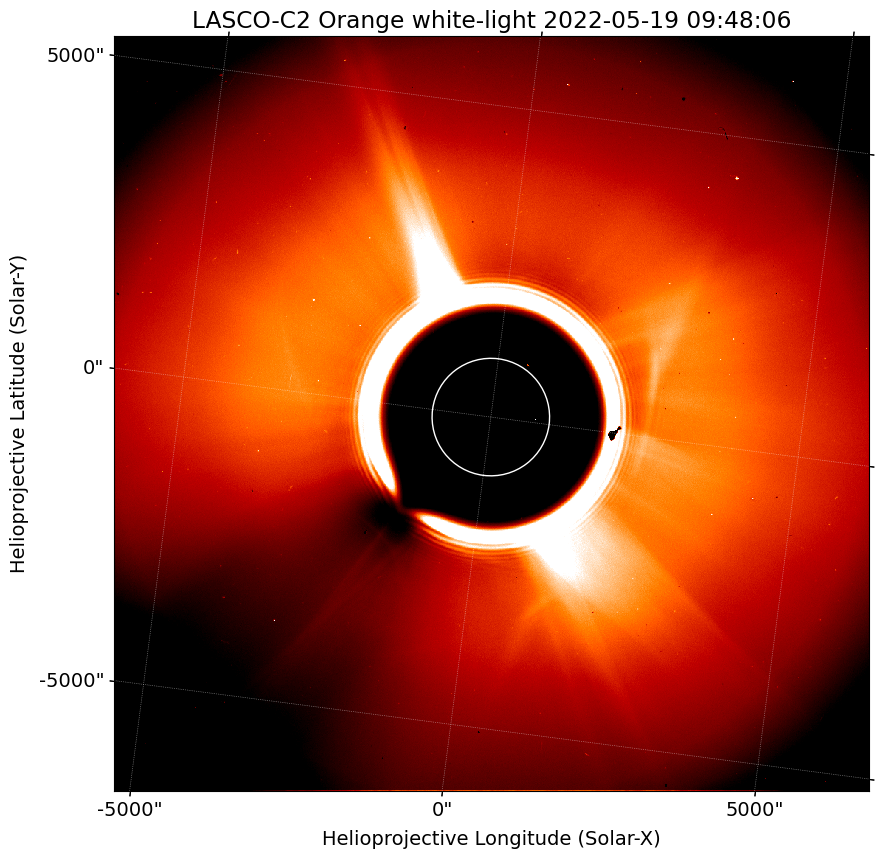

In [113]:
basemap.plot(vmin=1500,vmax=4500,norm=colors.LogNorm())
basemap.draw_limb()

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


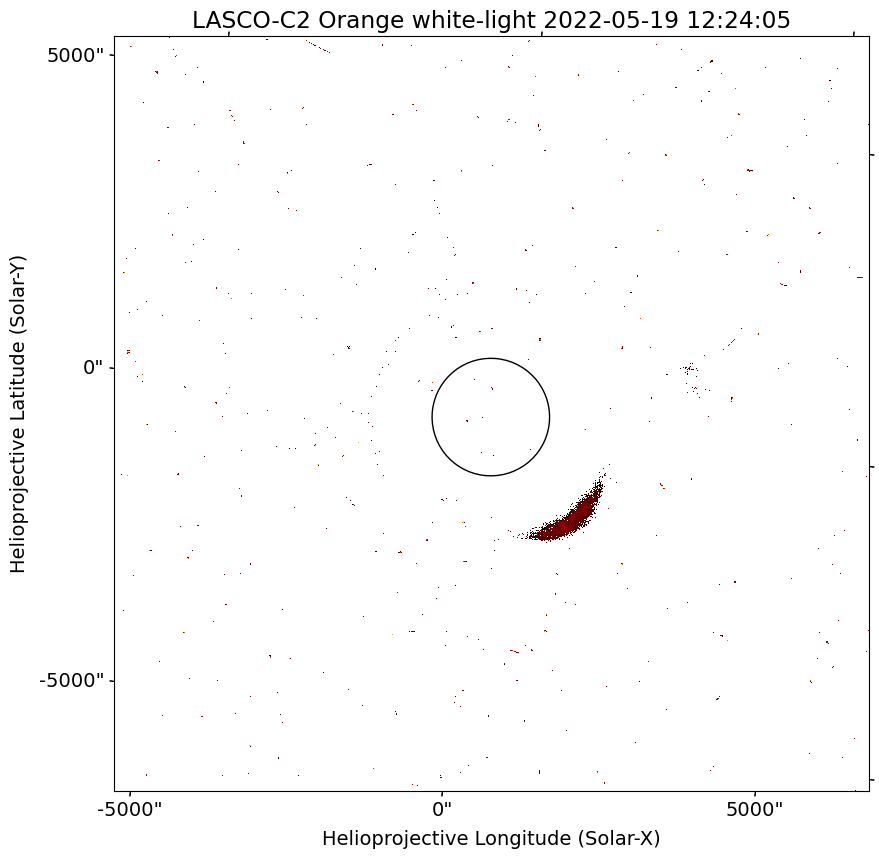

In [115]:
ind=3
lasco_bdmaps[ind].plot()
#lasco_bdmaps[ind].draw_limb(rsun=2.5,color='r')
lasco_bdmaps[ind].draw_limb(color='k')
plt.savefig(outdir+'LASCO_BD_'+lasco_times[ind]+'.png',bbox_inches='tight')

In [79]:
bsimg = basemap.data-np.nanmean(basemap.data)
bsimg = bsimg.astype(float)
#bsimg[bsimg < 100.] = np.nan
#bsimg[bsimg > 1000.] = np.nan
basemap2 = sunpy.map.Map(bsimg,basemap.meta)

In [68]:
smooth = ndimage.gaussian_filter(basemap.data, sigma=(9, 9), order=0)
smoothmap = sunpy.map.Map(smooth,basemap.meta)
bsimg = basemap.data-smooth
bsimg = bsimg.astype(float)
basemap3 = sunpy.map.Map(bsimg,basemap.meta)

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


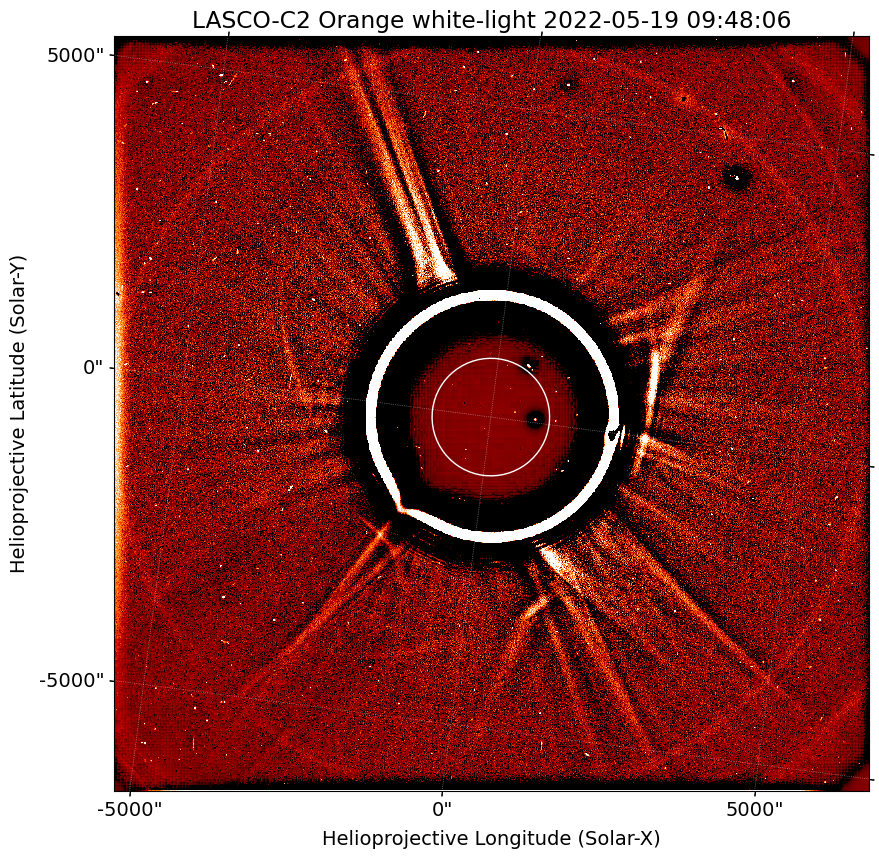

In [127]:
basemap3.plot(vmin=-20,vmax=150)
basemap3.draw_limb()

In [129]:
ind=0
smooth = ndimage.gaussian_filter(lasco_maps[ind].data, sigma=(9, 9), order=0)
smoothmap = sunpy.map.Map(smooth,lasco_maps[ind].meta)
bsimg = lasco_maps[ind].data-smooth
bsimg = bsimg.astype(float)
smoothbckg = sunpy.map.Map(bsimg,lasco_maps[ind].meta)

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


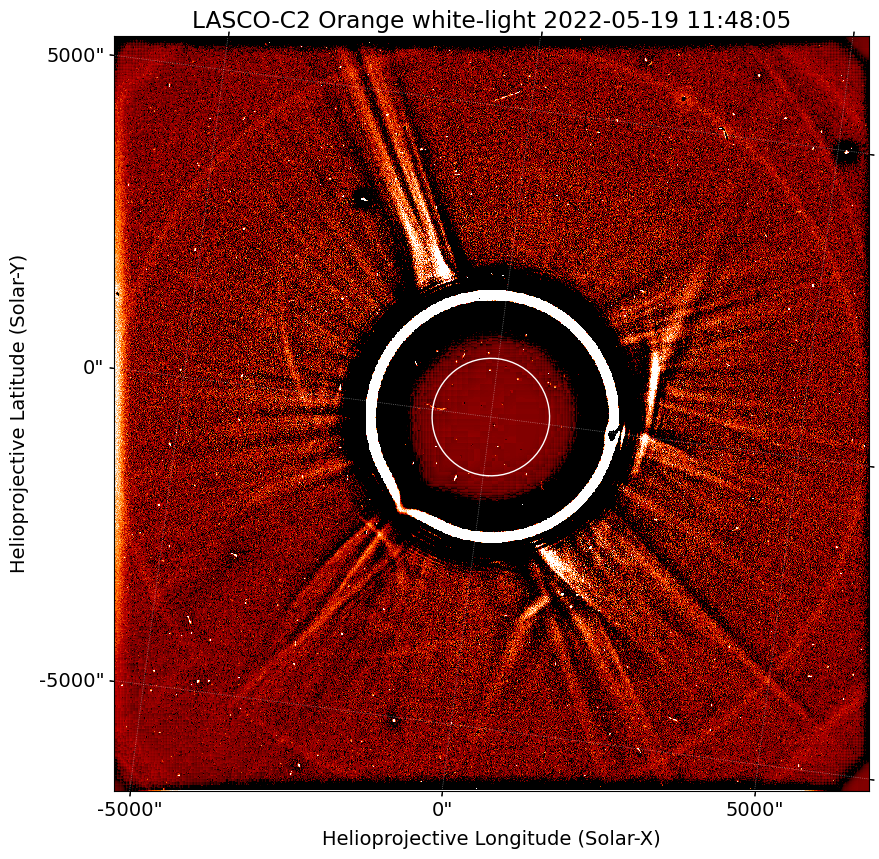

In [130]:
smoothbckg.plot(vmin=-20,vmax=150)
smoothbckg.draw_limb()
plt.savefig(outdir+'LASCO_preevent.png',bbox_inches='tight')